In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Sequence

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# Black code formatter (Optional)
%load_ext nb_black
# auto reload imports
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [54]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data

<IPython.core.display.Javascript object>

In [55]:
# Load data

test_df = load_data(filename="test.csv")
train_df = load_data(filename="train.csv")

Shape of data: (418, 11)

Shape of data: (891, 12)



<IPython.core.display.Javascript object>

# Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	~ Sex	
Age	~ Age in years	
sibsp	~ # of siblings / spouses aboard the Titanic	
parch	~ # of parents / children aboard the Titanic	
ticket ~	Ticket number	
fare	~ Passenger fare	
cabin	~ Cabin number	
embarked	~ Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [57]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<IPython.core.display.Javascript object>

In [58]:
# Checking for null values

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>

In [59]:
# Checking for null values

test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<IPython.core.display.Javascript object>

In [60]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<IPython.core.display.Javascript object>

## Removing Uninformative Columns

In [61]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]

<IPython.core.display.Javascript object>

### Explanation:
#### The following columns, namely 'PassengerId', 'Name', 'Ticket', and 'Cabin', do not contribute meaningful information to the dataset. Therefore, we will exclude them from our analysis by dropping these columns.

In [62]:
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)

<IPython.core.display.Javascript object>

In [63]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<IPython.core.display.Javascript object>

In [64]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


<IPython.core.display.Javascript object>

In [65]:
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

In [66]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<IPython.core.display.Javascript object>

In [67]:
test_df[["Age", "Fare"]].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


<IPython.core.display.Javascript object>

# Handling Missing Values in Train and Test Sets

## Age and Embarked in Train Set
For the 'Age' column in the train set, missing values are replaced with the mean age.
For the 'Embarked' column in the train set, missing values are replaced with the mode (most frequent value).

## Age and Fare in Test Set
For the 'Age' column in the test set, missing values are replaced with the mean age.
For the 'Fare' column in the test set, missing values are replaced with the median fare.

In [68]:
# Convert whitespace string to NaN in 'Fare' column
test_df["Fare"] = test_df["Fare"].replace("     nan", np.nan)

# Calculate mean and mode
age_mean_tr = np.mean(train_df["Age"])
age_mean_te = np.mean(test_df["Age"])
emb_mode = train_df["Embarked"].mode().values[0]
fare_md_tr = np.median(test_df["Fare"][~np.isnan(test_df["Fare"])])

# Replace missing values in train set
train_df["Age"] = train_df["Age"].fillna(value=age_mean_tr)
train_df["Embarked"] = train_df["Embarked"].fillna(value=emb_mode)

# Replace missing values in test set
test_df["Age"] = test_df["Age"].fillna(value=age_mean_te)
test_df["Fare"] = test_df["Fare"].fillna(value=fare_md_tr)

<IPython.core.display.Javascript object>

In [69]:
train_df.isna().sum(), test_df.isna().sum()

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64,
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64)

<IPython.core.display.Javascript object>

In [70]:
# Splitting the data into numerical and categorical data

cat_data = train_df.select_dtypes(include="O")
num_data = train_df.select_dtypes(exclude="O")

cat_data.shape, num_data.shape

((891, 2), (891, 6))

<IPython.core.display.Javascript object>

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

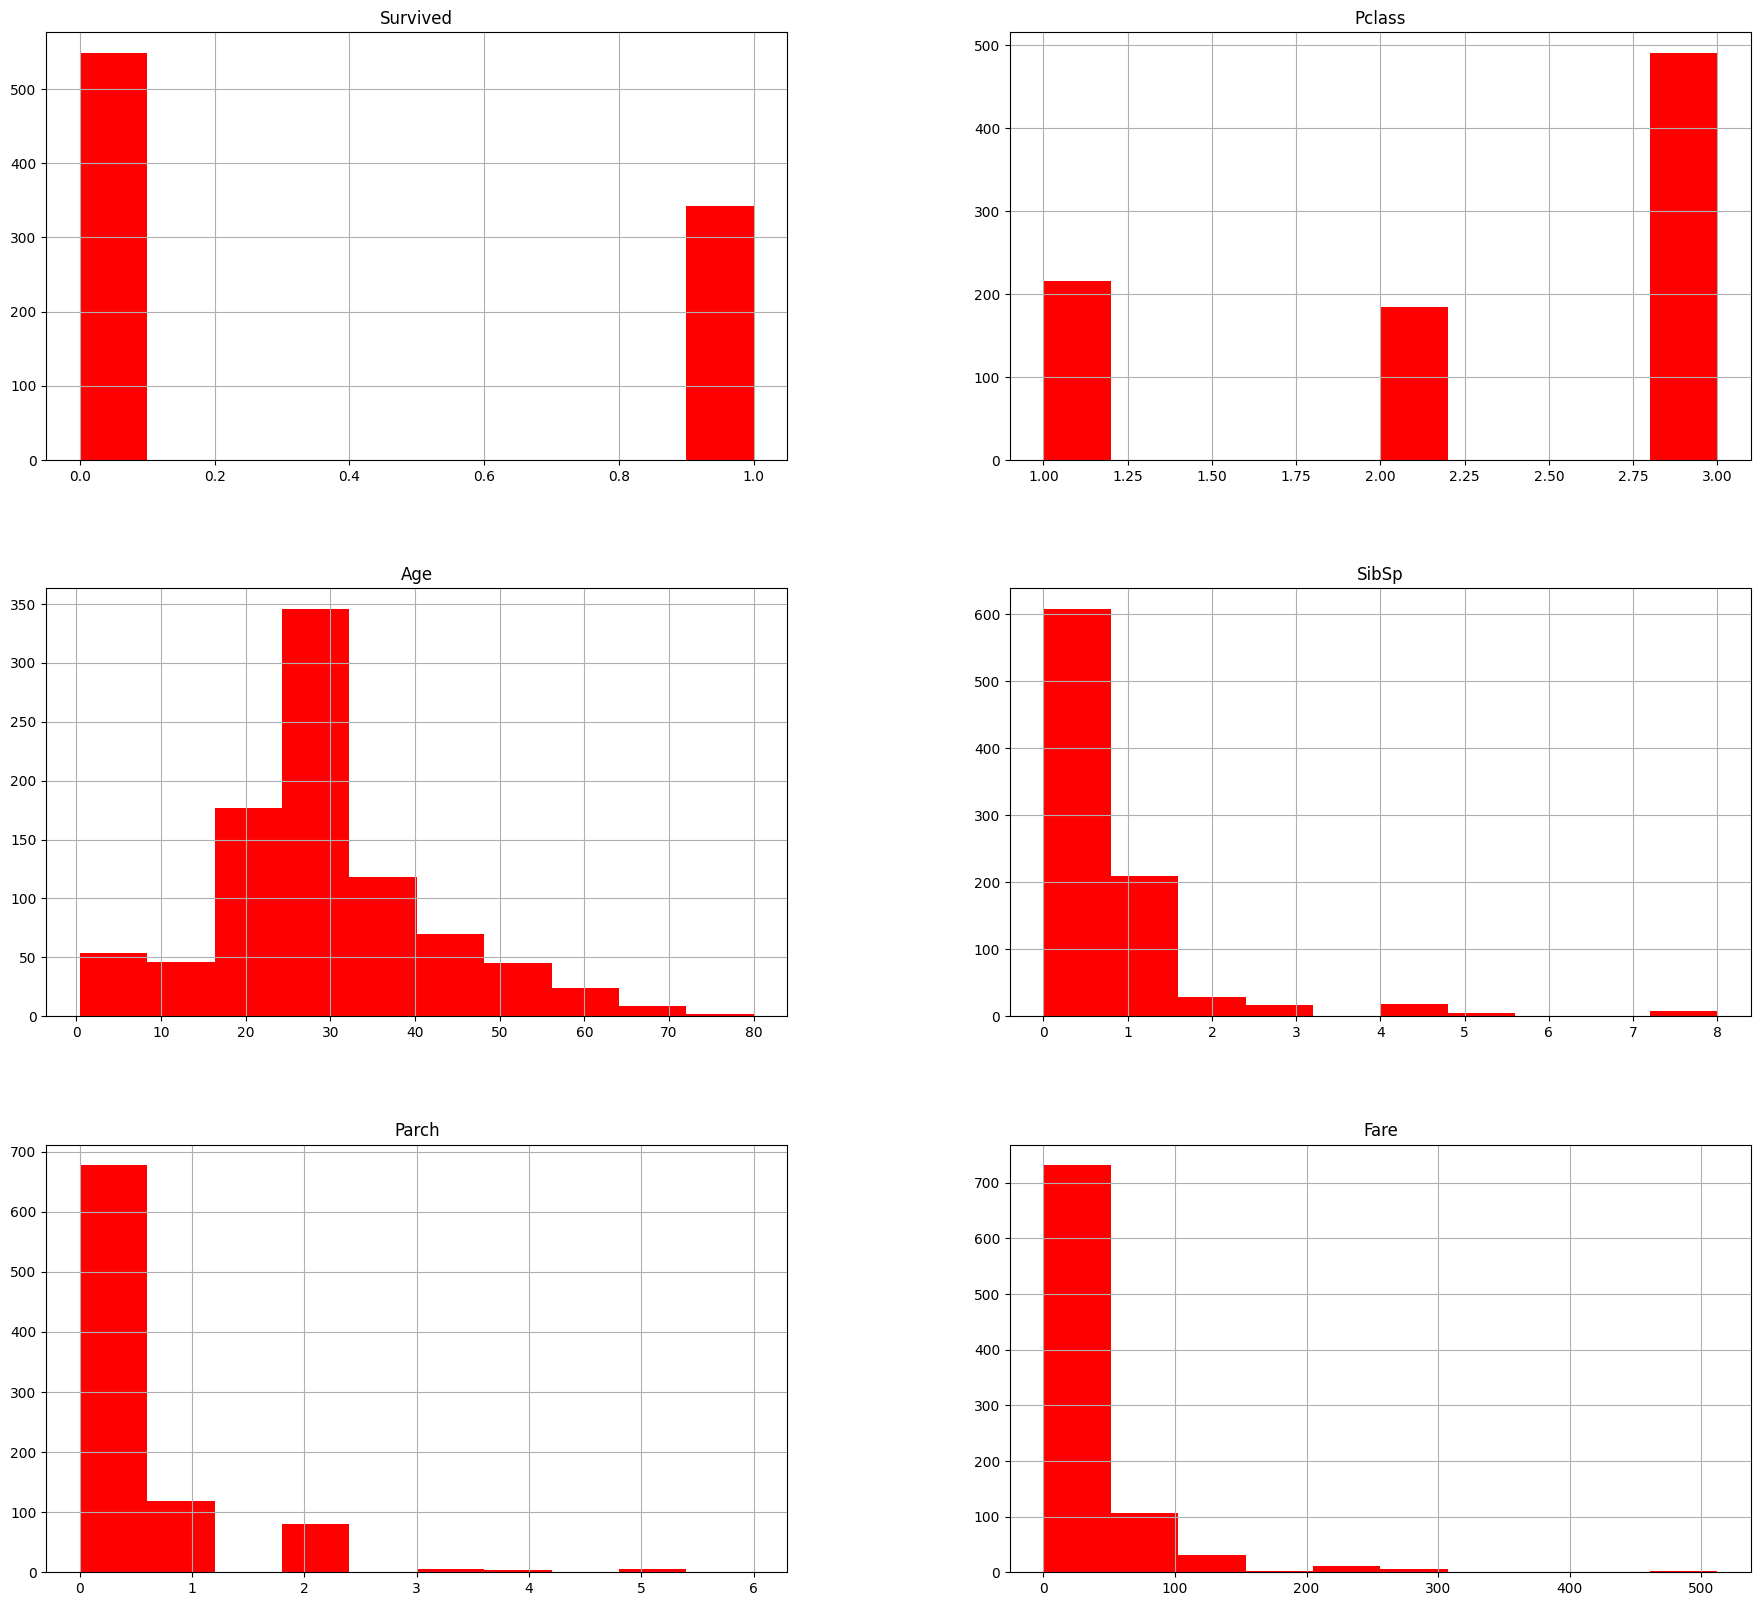

<IPython.core.display.Javascript object>

In [72]:
num_data.hist(figsize=(22, 20), color="red")

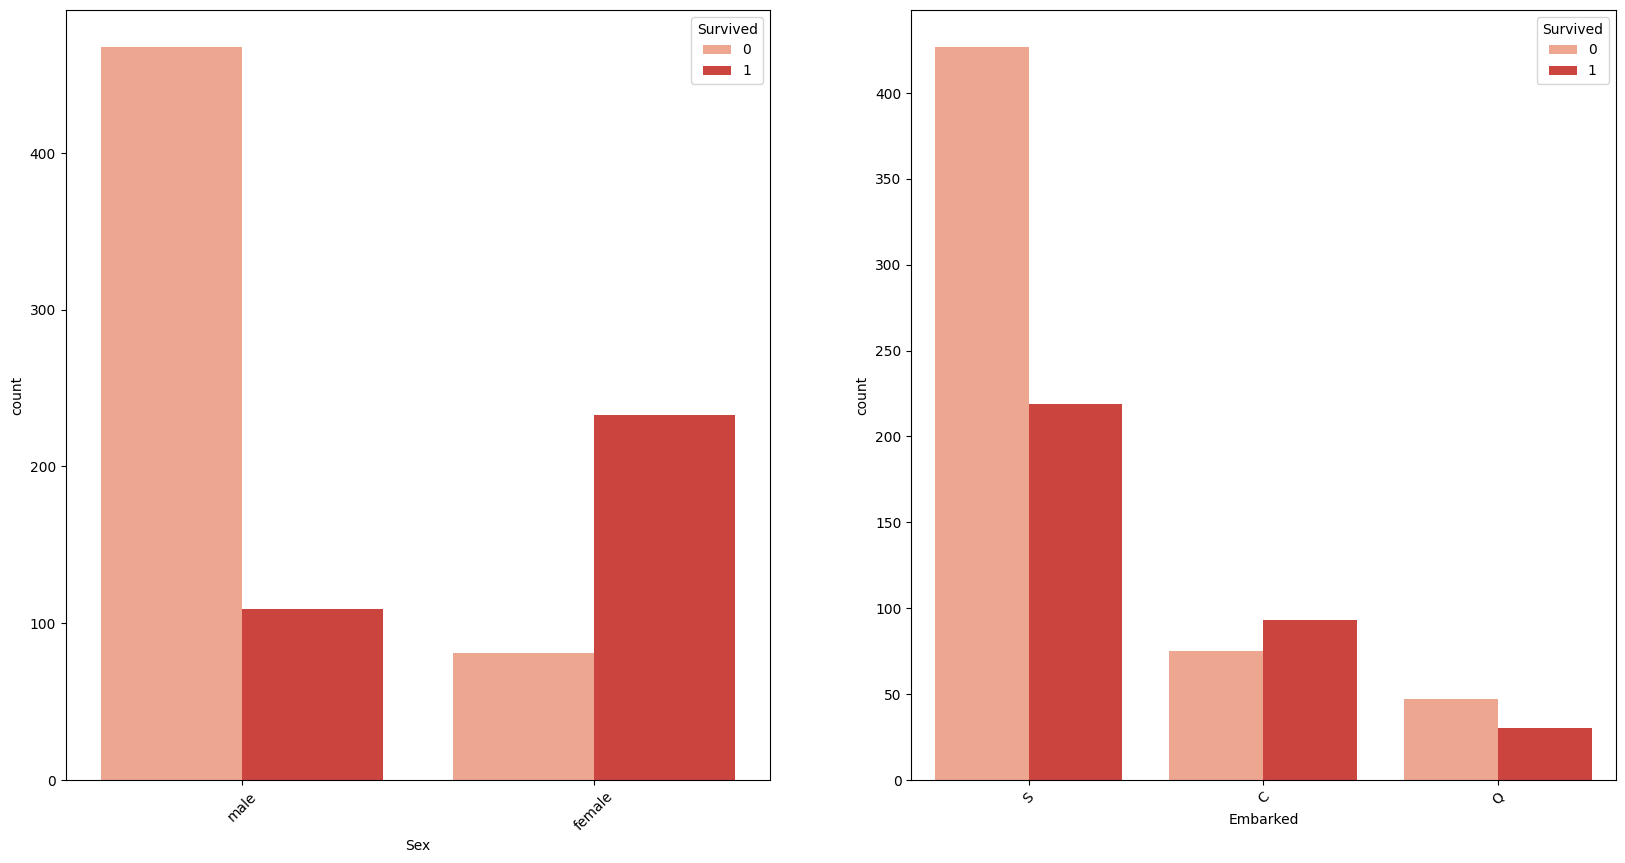

<IPython.core.display.Javascript object>

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Create a 1x2 grid

for i, j in enumerate(cat_data):
    ax = axes[i]  # Access individual subplot based on the index
    sns.countplot(
        x=j, data=train_df, hue="Survived", ax=ax, palette="Reds"
    )  # Use 'Reds' for red color palette
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [88]:
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [90]:
train_df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In the 'Sex' column of the train_df dataset, there is a higher count of males (577) compared to females (314). 
Upon visualizing this information using a bar chart, it becomes apparent that males experienced a significant 
increase in deaths, whereas females had a higher survival rate.

Regarding the 'Embarked' column in train_df, individuals from the 
'S' embarkation point exhibited both a higher survival rate and the highest count of passengers (646).

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


vars_to_scale = ["Age", "Fare"]
vars_to_enc = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# ===== OHE =====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# ===== Scaler =====
scaler = MinMaxScaler()

col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, vars_to_enc), ("scaler", scaler, vars_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Pclass', 'Sex', 'SibSp', 'Parch',
                                  'Embarked']),
                                ('scaler', MinMaxScaler(), ['Age', 'Fare'])])

<IPython.core.display.Javascript object>

In [96]:
tr = col_transformer.fit_transform(train_df)
pd.DataFrame(tr, columns=col_transformer.get_feature_names_out()).head()

,ohe__Pclass_1,ohe__Pclass_2,ohe__Pclass_3,ohe__Sex_female,ohe__Sex_male,ohe__SibSp_0,ohe__SibSp_1,ohe__SibSp_2,ohe__SibSp_3,ohe__SibSp_4,ohe__SibSp_5,ohe__SibSp_8,ohe__Parch_0,ohe__Parch_1,ohe__Parch_2,ohe__Parch_3,ohe__Parch_4,ohe__Parch_5,ohe__Parch_6,ohe__Embarked_C,ohe__Embarked_Q,ohe__Embarked_S,scaler__Age,scaler__Fare,remainder__Survived
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.271174,0.014151,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.472229,0.139136,1.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.321438,0.015469,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.434531,0.103644,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.434531,0.015713,0.0


<IPython.core.display.Javascript object>

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

RANDOM_STATE = 123
TARGET = "Survived"

X_train = train_df.drop(columns="Survived")
y_train = train_df["Survived"]

# Init
logit = LogisticRegression(random_state=RANDOM_STATE)

pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Embarked']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Fare'])])),
                ('logit', LogisticRegression(random_state=123))])

<IPython.core.display.Javascript object>

In [105]:
# Fit
pipe_logit.fit(X_train, y_train)

# Make predictions
y_pred_2 = pipe_logit.predict(test_df)


<IPython.core.display.Javascript object>

In [106]:
y_pred_2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<IPython.core.display.Javascript object>